# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [4]:
# Импортируем библиотеку pandas, которая предоставляет мощные инструменты для работы с данными
import pandas as pd

# Читаем CSV файл с отзывами и сохраняем его в DataFrame reviews_sample
# Файл находится в папке data, разделителем является запятая
reviews_sample = pd.read_csv("data/reviews_sample.csv", delimiter=",")

# Читаем CSV файл с рецептами и сохраняем его в DataFrame recipes_sample
# Указываем конкретные столбцы, которые нас интересуют: 'id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'
# Преобразуем столбец 'submitted' в формат даты
recipes_sample = pd.read_csv(
    "data/recipes_sample.csv", 
    delimiter=",", 
    usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'], 
    parse_dates=['submitted']
)

# Отображаем первые 5 строк DataFrame recipes_sample для ознакомления с данными
recipes_sample.head()


,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [5]:
# Импортируем библиотеку xlwings, которая позволяет управлять Excel из Python
import xlwings as xw

# Создаем выборку, состоящую из 5% случайных строк из DataFrame reviews_sample
procent5_reviews = reviews_sample.sample(frac=0.05)

# Создаем выборку, состоящую из 5% случайных строк из DataFrame recipes_sample
procent5_recipes = recipes_sample.sample(frac=0.05)

# Создаем новый Excel файл (книга)
wb = xw.Book()

# Пытаемся добавить новый лист с именем 'Рецепты'
try:
    sht_recipes = wb.sheets.add('Рецепты')
# Если лист с именем 'Рецепты' уже существует, выбираем его
except:
    sht_recipes = wb.sheets['Рецепты']

# Записываем DataFrame procent5_recipes на лист 'Рецепты', начиная с ячейки A1
sht_recipes.range('A1').value = procent5_recipes

# Пытаемся добавить новый лист с именем 'Отзывы'
try:
    sht_reviews = wb.sheets.add('Отзывы')
# Если лист с именем 'Отзывы' уже существует, выбираем его
except:
    sht_reviews = wb.sheets['Отзывы']

# Записываем DataFrame procent5_reviews на лист 'Отзывы', начиная с ячейки A1
sht_reviews.range('A1').value = procent5_reviews

# Сохраняем книгу
wb.save()

# Закрываем книгу
wb.close()


com_error: (-2147352567, 'Ошибка.', (0, 'Microsoft Excel', 'Сохранить файл под именем, совпадающим с именем открытого документа, невозможно. Укажите другое имя или закройте другой документ.', 'xlmain11.chm', 0, -2146827284), None)

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [ ]:
# Создаем список seconds_arr, где каждый элемент - количество минут из procent5_recipes, умноженное на 60, чтобы перевести их в секунды
seconds_arr = [i * 60 for i in procent5_recipes['minutes']]

# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист с названием 'Рецепты' из открытой книги
sht_recipes = wb.sheets['Рецепты']

# Записываем название нового столбца 'seconds_assign' в ячейку H1
sht_recipes.range('H1').value = 'seconds_assign'

# Записываем значения из списка seconds_arr в столбец H, начиная с ячейки H2
# Используем параметр transpose=True для записи данных вертикально
sht_recipes.range('H2').options(transpose=True).value = seconds_arr

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [6]:
# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист с названием 'Рецепты' из открытой книги
sht_recipes = wb.sheets['Рецепты']

# Записываем название нового столбца 'seconds_formula' в ячейку I1
sht_recipes.range('I1').value = 'seconds_formula'

# Используем цикл для заполнения столбца I формулами для перевода минут в секунды
for i in range(2, len(procent5_recipes['minutes']) + 2):
    # Записываем формулу в ячейку I, где 'D' столбец содержит значения минут
    sht_recipes.range('I' + str(i)).value = '=D' + str(i) + '*60'

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


com_error: (-2146827864, 'OLE error 0x800a01a8', None, None)

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [ ]:
# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист с названием 'Рецепты' из открытой книги
sht_recipes = wb.sheets['Рецепты']

# Устанавливаем жирный шрифт для заголовков столбцов в диапазоне A1:I1 на листе 'Рецепты'
sht_recipes.range('A1:I1').font.bold = True

# Устанавливаем выравнивание по центру для заголовков столбцов в диапазоне A1:I1 на листе 'Рецепты'
sht_recipes.range('A1:I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

# Получаем лист с названием 'Отзывы' из открытой книги
sht_reviews = wb.sheets['Отзывы']

# Устанавливаем жирный шрифт для заголовков столбцов в диапазоне A1:I1 на листе 'Отзывы'
sht_reviews.range('A1:I1').font.bold = True

# Устанавливаем выравнивание по центру для заголовков столбцов в диапазоне A1:I1 на листе 'Отзывы'
sht_reviews.range('A1:I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [ ]:
# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист с названием 'Рецепты' из открытой книги
sht_recipes = wb.sheets['Рецепты']

# Проходим по всем строкам столбца D, начиная со второй строки до конца данных
for i in range(2, len(procent5_recipes['minutes']) + 2):
    # Проверяем значение ячейки в столбце D
    cell_value = sht_recipes.range('D' + str(i)).value
    # Если значение меньше 5 минут, окрашиваем ячейку в зелёный цвет
    if cell_value < 5:
        sht_recipes.range('D' + str(i)).color = (0, 255, 0)
    # Если значение больше 10 минут, окрашиваем ячейку в красный цвет
    elif cell_value > 10:
        sht_recipes.range('D' + str(i)).color = (255, 0, 0)
    # Если значение от 5 до 10 минут включительно, окрашиваем ячейку в жёлтый цвет
    else:
        sht_recipes.range('D' + str(i)).color = (255, 255, 0)

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [ ]:
# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист с названием 'Рецепты' из открытой книги
sht_recipes = wb.sheets['Рецепты']

# Добавляем заголовок нового столбца 'n_reviews' в ячейку J1
sht_recipes.range('J1').value = 'n_reviews'

# Проходим по всем строкам, начиная со второй строки до конца данных
for i in range(2, len(procent5_recipes['minutes']) + 2):
    # Записываем формулу COUNTIF в ячейку J для подсчета количества отзывов для каждого рецепта
    # Формула считает количество ячеек в столбце D листа 'Отзывы', которые равны значению в столбце C текущей строки
    sht_recipes.range(f'J{i}').formula = f'=COUNTIF(Отзывы!D:D,C{i})'

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [ ]:
def validate(curr_sht, recip_sht):
    # Получаем список всех значений из столбца C на листе 'Рецепты'
    recipe_chk = recip_sht.range('C2:C' + str(recip_sht.range('C2').end('down').last_cell.row)).value
    
    # Проходим по всем строкам листа 'Отзывы', начиная со второй строки до конца данных
    for i in range(2, len(procent5_reviews['recipe_id']) + 2):
        # Проверяем значение ячейки в столбце F, должно быть в диапазоне [0, 1, 2, 3, 4, 5]
        # и значение ячейки в столбце D, должно быть в списке recipe_chk
        if curr_sht.range(f'F{i}').value not in [0, 1, 2, 3, 4, 5] or curr_sht.range(f'D{i}').value not in recipe_chk:
            # Если одно из условий не выполняется, окрашиваем всю строку в красный цвет
            curr_sht.range((i, 1), (i, 10)).color = (255, 0, 0)

# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Вызываем функцию validate для проверки данных на листе 'Отзывы' с ссылкой на лист 'Рецепты'
validate(wb.sheets['Отзывы'], wb.sheets['Рецепты'])

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [ ]:
import csv
import xlwings as xw

# Открываем CSV файл 'recipes_model.csv' с использованием кодировки utf-8
with open('./data/recipes_model.csv', 'r', encoding='utf-8') as csvfile:
    # Создаем объект reader для чтения данных из CSV файла, используем табуляцию как разделитель
    reader = csv.reader(csvfile, delimiter='\t')
    # Считываем все строки данных в список data
    data = [row for row in reader]

# Открываем существующую книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Пытаемся добавить новый лист с названием 'Модель'
try:
    sht_model = wb.sheets.add('Модель')
# Если лист с названием 'Модель' уже существует, получаем его
except:
    sht_model = wb.sheets['Модель']

# Записываем данные из списка data на лист 'Модель', начиная с ячейки A2
# Параметр expand=True автоматически расширяет диапазон, если данных больше чем ячеек
sht_model.range('A2').options(expand=True).value = data

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


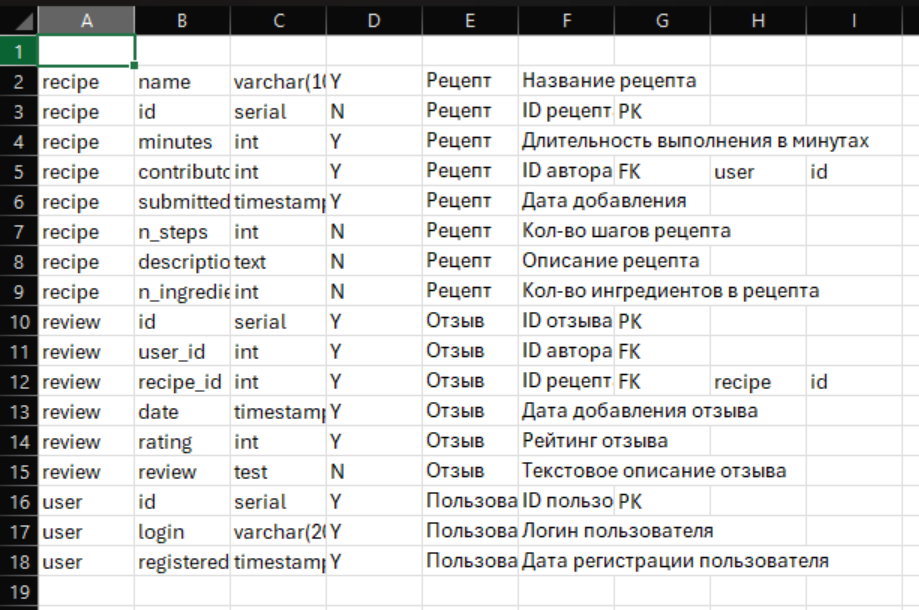

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
import xlwings as xw

# Открываем книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист 'Модель' из открытой книги
sht_model = wb.sheets["Модель"]

# Находим последнюю заполненную строку в столбце A, начиная с ячейки A2
max_row = sht_model.range("A2").end('down').row

# Формула для столбца J, используем CONCATENATE для объединения значений столбцов B, C, H, I, E и D
formula = "=CONCATENATE(B2, \" \", UPPER(C2), \" \", IF(E2=\"PK\", \"PRIMARY KEY\", IF(E2=\"FK\", \"REFERENCES \"&H2&\"(\"&I2&\")\", \"\")), IF(D2=\"Y\"&E2<>\"PK\", \" NOT NULL\", \"\"))"

# Записываем формулу в ячейку J2
sht_model.range('J2').formula = formula

# Автозаполнение формулы в столбце J от J2 до последней заполненной строки в столбце A
sht_model.range('J2').api.AutoFill(sht_model.range('J2:J'+ str(max_row)).api, xw.constants.AutoFillType.xlFillDefault)

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


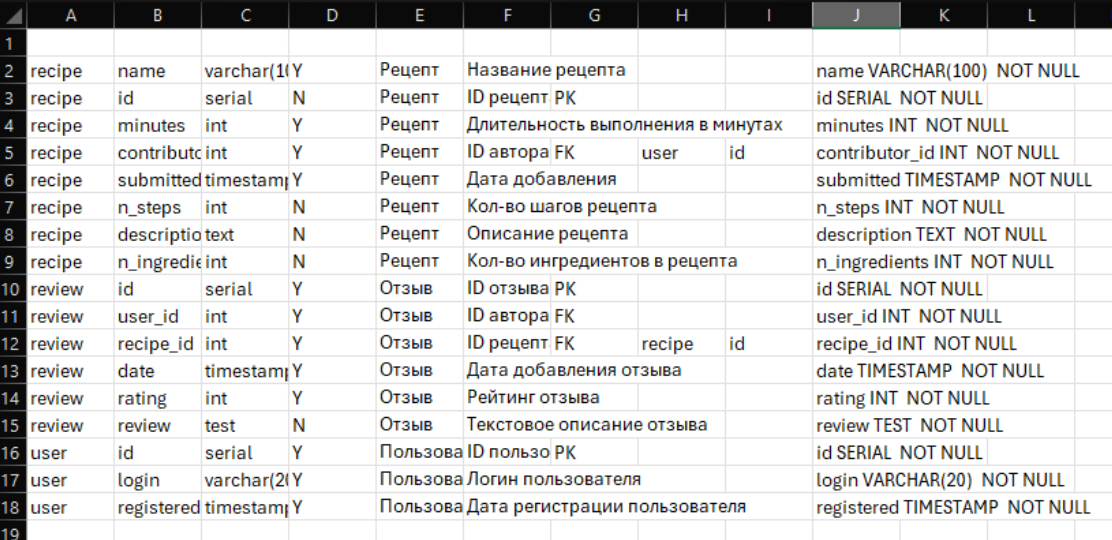

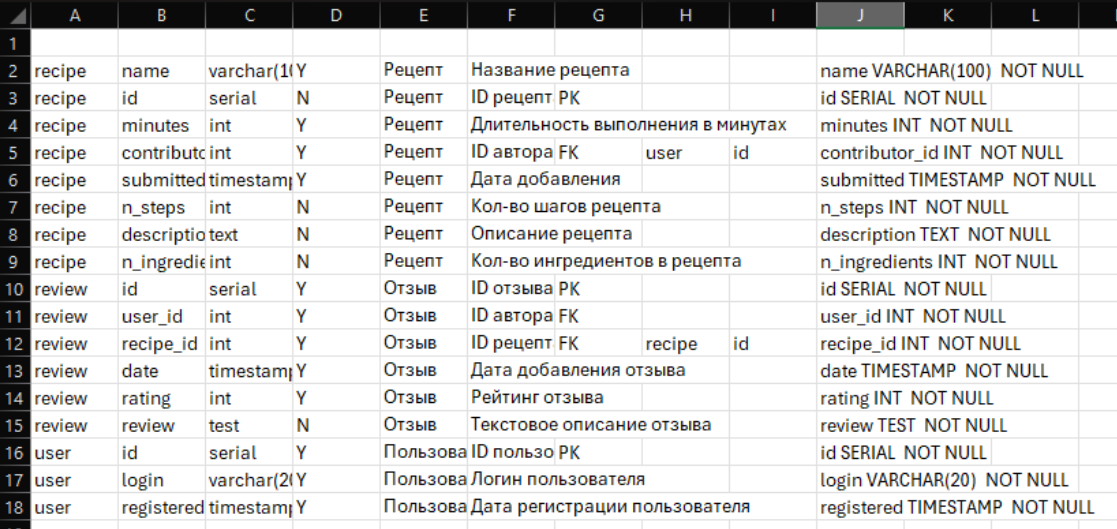

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
import xlwings as xw

# Открываем книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем лист 'Модель' из открытой книги
sht_model = wb.sheets["Модель"]

# Устанавливаем цвет фона для диапазона A2:F2
sht_model.range('A2:F2').color = 0x00ccff

# Автоматически подгоняем ширину столбцов по содержимому
sht_model.autofit('columns')

# Устанавливаем жирный шрифт для диапазона A2:F2
sht_model.range('A2:F2').font.bold = True

# Включаем автофильтр для использованного диапазона на листе
sht_model.used_range.api.AutoFilter(Field=1)

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

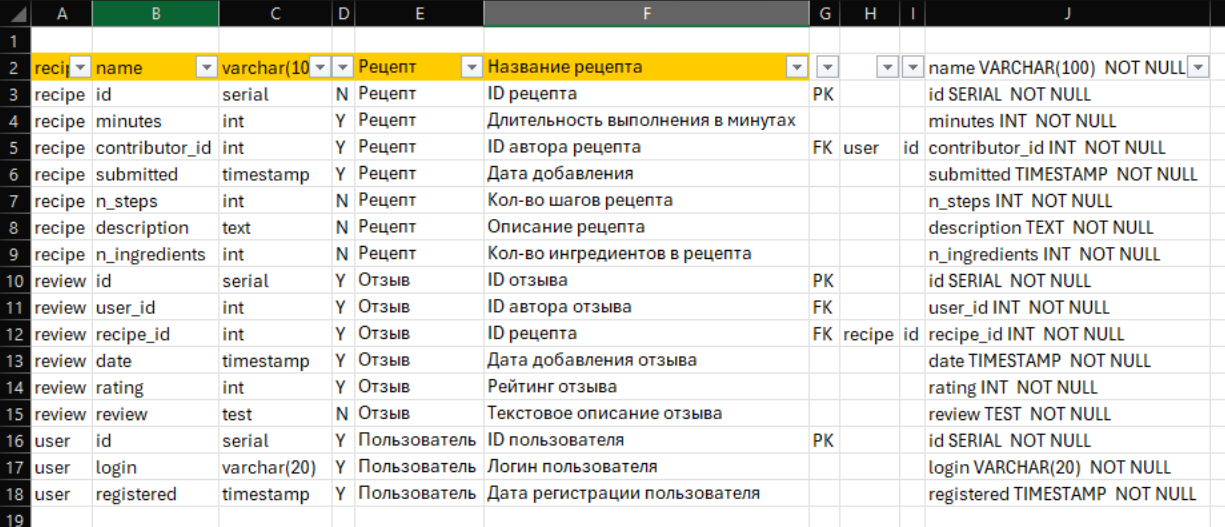

In [ ]:
import matplotlib.pyplot as plt
import xlwings as xw
import pandas as pd

# Открываем книгу Excel под названием 'Книга1.xlsx'
wb = xw.Book('Книга1.xlsx')

# Получаем данные из листа 'Модель' в диапазоне A:B
data = wb.sheets['Модель'].range('A:B').options(pd.DataFrame, header=1, index=False).value

# Задаем названия столбцов
data.columns = ['Entity', 'Attribute']

# Группируем данные по столбцу 'Entity' и считаем количество атрибутов
grouped_data = data.groupby('Entity').count()

# Добавляем новый лист 'Статистика'
wb.sheets.add('Статистика')
sht_stat = wb.sheets['Статистика']

# Записываем сгруппированные данные в лист 'Статистика' начиная с ячейки A1
sht_stat.range('A1').value = grouped_data

# Строим график с использованием matplotlib
ax = grouped_data.plot(xlabel='Entity', y="Attribute", ylabel='Кол-во атрибутов', kind='bar', legend=list(grouped_data.index.values))

# Получаем объект фигуры графика
fig = ax.get_figure()

# Добавляем график как изображение на лист 'Статистика' в ячейку E2
sht_stat.pictures.add(fig, name='MyPlot', left=sht_stat.range('E2').left, top=sht_stat.range('E2').top, update=True)

# Сохраняем изменения в книге Excel
wb.save()

# Закрываем книгу Excel
wb.close()


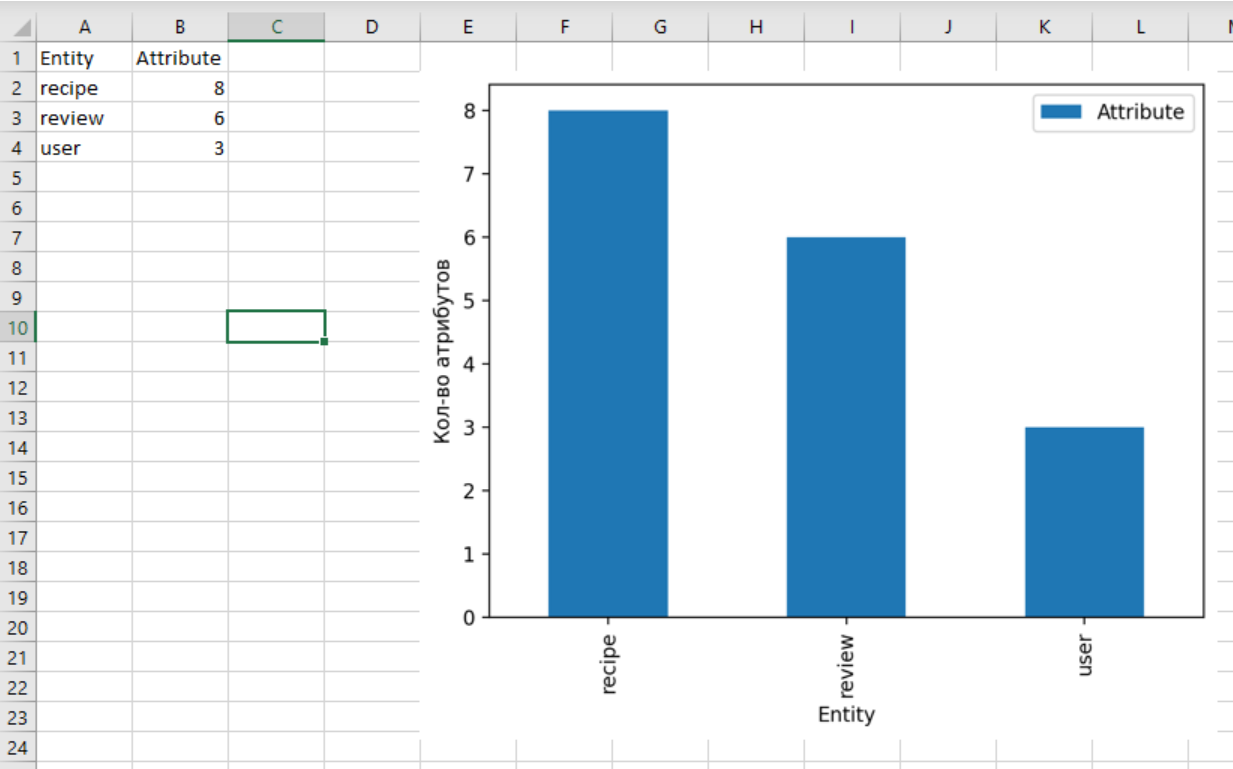